# Visualización de imágenes DICOM en Python

## Importación de librerías necesarias
Los módulos que a continuación se importan contienen funciones y utilidades que servirán para la visualización de imágenemos médica almacenadas en el formato DICOM.

In [58]:
!pip install pydicom
 # El _! pip install_ funciona para instalar librerias ,
# al correr el codigo suelta error por que en mi entorno no se encuentra instalado
# pydicom , lo instalamos y la siguiente celda deberia correr correctamente. =)

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
from skimage.io import imread
import matplotlib.pyplot as plt
from glob import glob
import pydicom as dicom # esta es la nueva libreria que nos permitira jugar con los archivos Dicom
import os

In [60]:
from google.colab import drive
drive.mount('/content/drive')
# en mi caso la carpeta donde se encuentran los archivos esta
# en mi drive, asi que voy a enlazar mi entonrno con drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Vamos a enlistar los contenidos de la carpeta en donde se encuentra el conjunto de datos de imágenes DICOM**

In [61]:
import os # en esta parte no me funcionaba por 2 horas y descubri
# que era por que se le iba la onda a colab asi que debia de importar otra vez os jajaja =(

# Cambia a la carpeta deseada en Google Drive= ya la camibie XD
PATH = '//content/drive/MyDrive/practica3_data'
print(os.listdir(PATH))
# concidera que el archivo que paso el profesor es .zip solo lo descomprimes en local y lo subes a tu drive

['full_archive.npz', 'overview.csv', 'tiff_images', 'dicom_dir']


**Echemos un vistazo a `overview.csv` que contiene un resumen de los contenidos**

In [62]:
data_df = pd.read_csv(os.path.join(PATH,"overview.csv"))
data_df.head()

,Unnamed: 0,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
0,0,60,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (1).dcm,0,ID_0000_AGE_0060_CONTRAST_1_CT.tif,ID_0000_AGE_0060_CONTRAST_1_CT.dcm
1,1,69,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (10).dcm,1,ID_0001_AGE_0069_CONTRAST_1_CT.tif,ID_0001_AGE_0069_CONTRAST_1_CT.dcm
2,2,74,True,APPLIED,../data/50_50_dicom_cases\Contrast\00001 (11).dcm,2,ID_0002_AGE_0074_CONTRAST_1_CT.tif,ID_0002_AGE_0074_CONTRAST_1_CT.dcm
3,3,75,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (12).dcm,3,ID_0003_AGE_0075_CONTRAST_1_CT.tif,ID_0003_AGE_0075_CONTRAST_1_CT.dcm
4,4,56,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (13).dcm,4,ID_0004_AGE_0056_CONTRAST_1_CT.tif,ID_0004_AGE_0056_CONTRAST_1_CT.dcm


**En este caso nos interesan las imagénes que se almacenan en `dicom_dir`, así que importémoslas y veamos qué hay dentro de ese directorio**

In [ ]:
print("Número de archivos DICOM:", len(os.listdir(PATH+"dicom_dir"))) # en esta parte no me cargaba aunque pusiera la carpeta faltante
# asi que le pregunte al chat y me cambio la celda por esta nueva :

In [64]:
print("Número de archivos DICOM:", len(os.listdir(os.path.join(PATH, "dicom_dir")))) # Use os.path.join to build the correct path

Número de archivos DICOM: 100


**Definiremos una función auxiliar que nos ayudará a explorar la información relacionada con cada archivo de manera más sencilla**

In [65]:
import os
import pandas as pd
from glob import glob
# aqui igual me estanque por 20 min. pero con ayuda del chat lo solucione
def process_data(path):
    # Use os.path.join to ensure correct path construction
    filepaths = glob(os.path.join(PATH, path))

    # Check if any files were found
    if not filepaths:
        print(f"No files found matching pattern: {os.path.join(PATH, path)}")
        return pd.DataFrame()  # Return an empty DataFrame if no files found

    data = pd.DataFrame([{'path': filepath} for filepath in filepaths])
    data['file'] = data['path'].map(os.path.basename)
    data['ID'] = data['file'].map(lambda x: str(x.split('_')[1]))
    data['Age'] = data['file'].map(lambda x: int(x.split('_')[3]))
    data['Contrast'] = data['file'].map(lambda x: bool(int(x.split('_')[5])))
    data['Modality'] = data['file'].map(lambda x: str(x.split('_')[6].split('.')[-2]))
    return data

**Ahora sí, procesemos la información de las imágenes DICOM**

In [66]:
dicom_data = process_data('dicom_dir/*.dcm') # la funcion faltante era process_data

**Visualicemos la información**

In [67]:
dicom_data.head(10)

,path,file,ID,Age,Contrast,Modality
0,//content/drive/MyDrive/practica3_data/dicom_d...,ID_0000_AGE_0060_CONTRAST_1_CT.dcm,0000,60,True,CT
1,//content/drive/MyDrive/practica3_data/dicom_d...,ID_0024_AGE_0060_CONTRAST_1_CT.dcm,0024,60,True,CT
2,//content/drive/MyDrive/practica3_data/dicom_d...,ID_0023_AGE_0061_CONTRAST_1_CT.dcm,0023,61,True,CT
3,//content/drive/MyDrive/practica3_data/dicom_d...,ID_0022_AGE_0074_CONTRAST_1_CT.dcm,0022,74,True,CT
4,//content/drive/MyDrive/practica3_data/dicom_d...,ID_0013_AGE_0060_CONTRAST_1_CT.dcm,0013,60,True,CT
5,//content/drive/MyDrive/practica3_data/dicom_d...,ID_0005_AGE_0048_CONTRAST_1_CT.dcm,0005,48,True,CT
6,//content/drive/MyDrive/practica3_data/dicom_d...,ID_0001_AGE_0069_CONTRAST_1_CT.dcm,0001,69,True,CT
7,//content/drive/MyDrive/practica3_data/dicom_d...,ID_0025_AGE_0074_CONTRAST_1_CT.dcm,0025,74,True,CT
8,//content/drive/MyDrive/practica3_data/dicom_d...,ID_0020_AGE_0066_CONTRAST_1_CT.dcm,0020,66,True,CT
9,//content/drive/MyDrive/practica3_data/dicom_d...,ID_0014_AGE_0071_CONTRAST_1_CT.dcm,0014,71,True,CT


**La información de las imágenes DICOM se encuentra en voxeles, la representación tridimencional de 2D. Esto quiere decir que cada componente de la imagen tiene dimensiones de alto, ancho, y profundidad. Programemos unas funciones más que nos ayudarán a extraer información que indiquemos y a mostrarla en dos dimensiones (2D)**

In [68]:
# Mostrar imágenes
def show_images(data, dim=16, imtype='DICOM'):
    img_data = list(data[:dim].T.to_dict().values())
    f, ax = plt.subplots(4,4, figsize=(16,20))
    for i,data_row in enumerate(img_data):
        if(imtype=='DICOM'):
            data_row_img = dicom.dcmread(data_row['path'])
        if(imtype=='DICOM'):
            ax[i//4, i%4].imshow(data_row_img.pixel_array, cmap=plt.cm.bone)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title('Modality: {Modality} Age: {Age}\nSlice: {ID} Contrast: {Contrast}'.format(**data_row))
    plt.show()
    # en esta parte es como el centro de control de visualizacion de las imagenes DIOCOM, pero de ello hablo mas a profundidad en mi pdf
    # Aaaa y a este no le movi nada XD

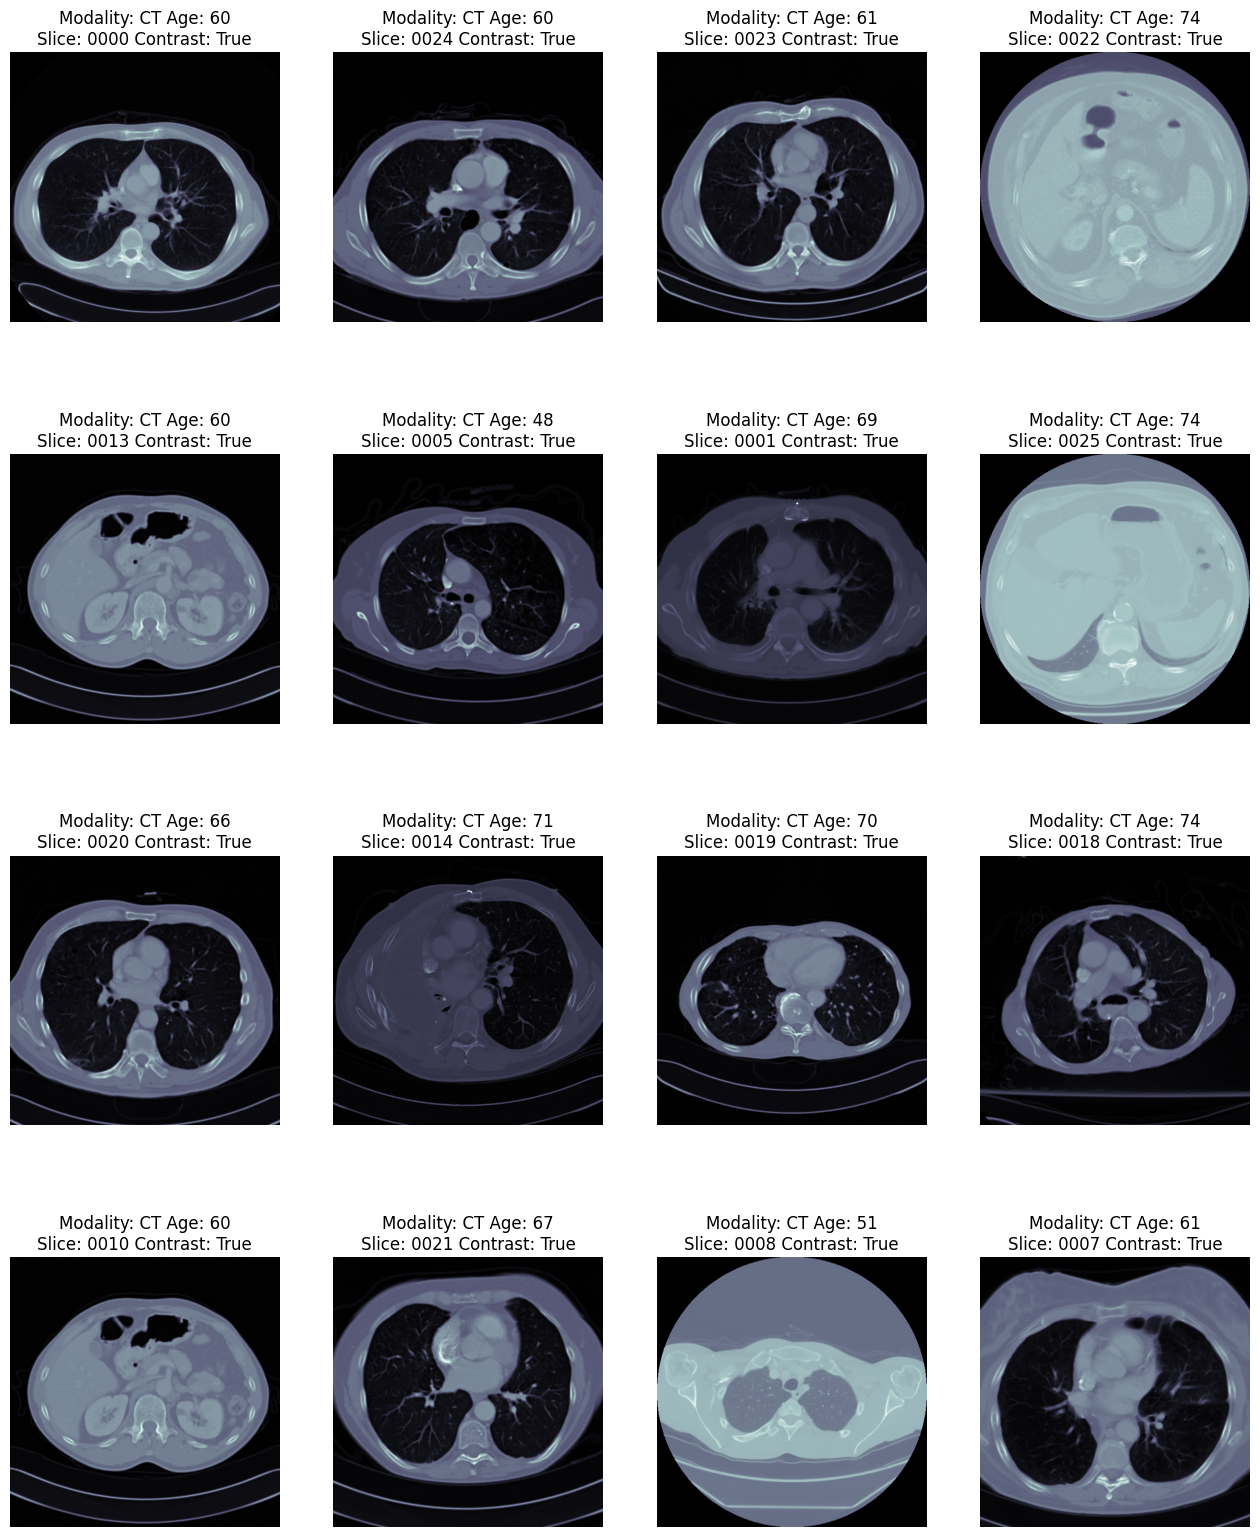

In [69]:
show_images(dicom_data,16,'DICOM') #ejecucion de las imagenes seleccionadas

**Ahora extraigamos los metadatos de una de las imágenees de muestra**

In [70]:
dicom_file_path = list(dicom_data[:1].T.to_dict().values())[0]['path']
dicom_file_dataset = dicom.dcmread(dicom_file_path)
dicom_file_dataset
# en esta parte se encuentran los datos de los pacientes que aparecen sus TC en la parte de arriba 10/10 =)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 194
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008,0000) Group Length                        UL: 430
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088218367595492

## Tarea adicional:
Crear una función para la extracción de información de dimensiones de los voxeles, investigar porqué este dato es relevante para el procesamiento de imágenes médicas. (Usar la librería de `pydicom`)

In [ ]:
  def extract_voxel_data():


# Extraccion de Infromacion "Tarea adicional"

In [33]:
import pydicom
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [34]:
# Verificar las dimensiones
print(f"Dimensiones del archivo DICOM: {pixel_array.shape}")

Dimensiones del archivo DICOM: (512, 512)


In [35]:
import pydicom

# Cargar el archivo DICOM
dicom_path = '/content/drive/MyDrive/practica3_data/dicom_dir/ID_0021_AGE_0067_CONTRAST_1_CT.dcm'
dicom = pydicom.dcmread(dicom_path)

# Verificar las características del archivo DICOM
dicom_info = {
    "PatientID": dicom.PatientID if 'PatientID' in dicom else 'N/A',
    "Modality": dicom.Modality if 'Modality' in dicom else 'N/A',
    "StudyDescription": dicom.StudyDescription if 'StudyDescription' in dicom else 'N/A',
    "NumberOfFrames": dicom.NumberOfFrames if 'NumberOfFrames' in dicom else 'N/A',
    "PixelArrayShape": dicom.pixel_array.shape
}

print(dicom_info)


{'PatientID': 'TCGA-17-Z052', 'Modality': 'CT', 'StudyDescription': 'N/A', 'NumberOfFrames': 'N/A', 'PixelArrayShape': (512, 512)}


In [36]:
import pydicom

def obtener_dimensiones_voxeles(dicom_path):
    # Cargar el archivo DICOM
    dicom = pydicom.dcmread(dicom_path)

    # Extraer el espaciado de píxeles (tamaño en el plano X-Y)
    pixel_spacing = dicom.PixelSpacing if 'PixelSpacing' in dicom else [None, None]

    # Extraer el grosor del slice (tamaño en el eje Z)
    slice_thickness = dicom.SliceThickness if 'SliceThickness' in dicom else None

    # Espacio entre los slices (importante en series volumétricas)
    spacing_between_slices = dicom.SpacingBetweenSlices if 'SpacingBetweenSlices' in dicom else None

    # Imprimir la información extraída
    print(f"Espaciado de píxeles (X, Y): {pixel_spacing[0]} mm x {pixel_spacing[1]} mm")
    print(f"Grosor del slice (Z): {slice_thickness} mm")
    if spacing_between_slices:
        print(f"Espaciado entre slices: {spacing_between_slices} mm")
    else:
        print("Espaciado entre slices no especificado.")

    return {
        "pixel_spacing_x": pixel_spacing[0],
        "pixel_spacing_y": pixel_spacing[1],
        "slice_thickness": slice_thickness,
        "spacing_between_slices": spacing_between_slices
    }

# Ruta del archivo DICOM
dicom_path = '/content/drive/MyDrive/practica3_data/dicom_dir/ID_0021_AGE_0067_CONTRAST_1_CT.dcm'

# Llamar a la función
dimensiones_voxeles = obtener_dimensiones_voxeles(dicom_path)

print(dimensiones_voxeles)


Espaciado de píxeles (X, Y): 0.59375 mm x 0.59375 mm
Grosor del slice (Z): 5 mm
Espaciado entre slices no especificado.
{'pixel_spacing_x': '0.59375', 'pixel_spacing_y': '0.59375', 'slice_thickness': '5', 'spacing_between_slices': None}


In [37]:
# prompt: Crear una función para la extracción de información de dimensiones de los voxeles, investigar porqué este dato es relevante para el procesamiento de imágenes médicas. (Usar la librería de pydicom)

def obtener_dimensiones_voxeles(dicom_path):
    """
    Extrae las dimensiones de los voxeles de un archivo DICOM.

    Args:
        dicom_path: Ruta al archivo DICOM.

    Returns:
        Un diccionario que contiene las dimensiones de los voxeles:
            - pixel_spacing_x: Tamaño del voxel en el eje X (mm).
            - pixel_spacing_y: Tamaño del voxel en el eje Y (mm).
            - slice_thickness: Tamaño del voxel en el eje Z (mm).
            - spacing_between_slices: Espacio entre slices (mm).
    """
    try:
        # Cargar el archivo DICOM
        dicom = pydicom.dcmread(dicom_path)

        # Extraer el espaciado de píxeles (tamaño en el plano X-Y)
        pixel_spacing = dicom.PixelSpacing if 'PixelSpacing' in dicom else [None, None]

        # Extraer el grosor del slice (tamaño en el eje Z)
        slice_thickness = dicom.SliceThickness if 'SliceThickness' in dicom else None

        # Espacio entre los slices (importante en series volumétricas)
        spacing_between_slices = dicom.SpacingBetweenSlices if 'SpacingBetweenSlices' in dicom else None

        return {
            "pixel_spacing_x": pixel_spacing[0],
            "pixel_spacing_y": pixel_spacing[1],
            "slice_thickness": slice_thickness,
            "spacing_between_slices": spacing_between_slices
        }
    except Exception as e:
        print(f"Error al procesar el archivo DICOM: {e}")
        return None


# Ejemplo de uso:
dicom_path = '/content/drive/MyDrive/practica3_data/dicom_dir/ID_0021_AGE_0067_CONTRAST_1_CT.dcm'
dimensiones_voxeles = obtener_dimensiones_voxeles(dicom_path)

if dimensiones_voxeles:
    print("Dimensiones de los voxeles:")
    print(dimensiones_voxeles)

Dimensiones de los voxeles:
{'pixel_spacing_x': '0.59375', 'pixel_spacing_y': '0.59375', 'slice_thickness': '5', 'spacing_between_slices': None}


# Pruebas en genaral (tanto el codigo proporcionado, como la tarea adicional)

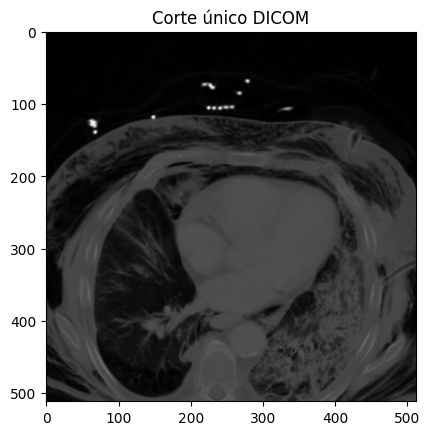

In [71]:
# Función para mostrar todos los cortes de un archivo DICOM
def mostrar_cortes_dicom(ruta_dicom):
    # Leer el archivo DICOM
    ds = pydicom.dcmread(ruta_dicom)

    # Verificar si contiene múltiples cortes (como en una imagen 3D)
    if hasattr(ds, 'pixel_array'):
        imagen = ds.pixel_array

        # Si es una imagen 2D (un solo corte), mostramos directamente
        if len(imagen.shape) == 2:
            plt.imshow(imagen, cmap='gray')
            plt.title('Corte único DICOM')
            plt.show()
        # Si es una imagen 3D (múltiples cortes), mostramos todos los cortes
        elif len(imagen.shape) == 3:
            fig, axes = plt.subplots(1, imagen.shape[0], figsize=(15, 5))
            for i, ax in enumerate(axes):
                ax.imshow(imagen[i], cmap='gray')
                ax.set_title(f'Corte {i+1}')
            plt.show()
    else:
        print("El archivo DICOM no contiene datos de imagen.")

# Ruta del archivo DICOM (sube el archivo o vincula tu Google Drive)
# Si lo subiste directamente a Colab, puedes usar '/content/nombre_del_archivo.dcm'
ruta_dicom = '//content/drive/MyDrive/practica3_data/dicom_dir/ID_0033_AGE_0071_CONTRAST_1_CT.dcm'

# Mostrar todos los cortes del archivo DICOM
mostrar_cortes_dicom(ruta_dicom)


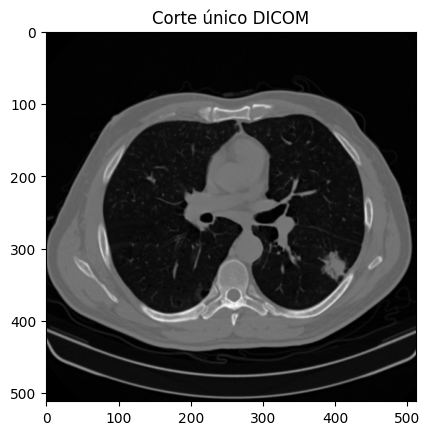

In [53]:
# Función para mostrar todos los cortes de un archivo DICOM
def mostrar_cortes_dicom(ruta_dicom):
    # Leer el archivo DICOM
    ds = pydicom.dcmread(ruta_dicom)

    # Verificar si contiene datos de imagen
    if hasattr(ds, 'pixel_array'):
        imagen = ds.pixel_array

        # Si es una imagen 2D (un solo corte), mostramos directamente
        if len(imagen.shape) == 2:
            plt.imshow(imagen, cmap='gray')
            plt.title('Corte único DICOM')
            plt.show()
        # Si es una imagen 3D (múltiples cortes), mostramos uno por uno
        elif len(imagen.shape) == 3:
            num_slices = imagen.shape[0]

            # Mostrar todos los cortes uno por uno
            for i in range(num_slices):
                plt.imshow(imagen[i], cmap='gray')
                plt.title(f'Corte {i+1}/{num_slices}')
                plt.show()
    else:
        print("El archivo DICOM no contiene datos de imagen.")

# Ruta del archivo DICOM (sube el archivo o vincula tu Google Drive)
# Si lo subiste directamente a Colab, puedes usar '/content/nombre_del_archivo.dcm'
ruta_dicom = '//content/drive/MyDrive/practica3_data/dicom_dir/ID_0099_AGE_0061_CONTRAST_0_CT.dcm'

# Mostrar todos los cortes del archivo DICOM
mostrar_cortes_dicom(ruta_dicom)


In [72]:
# Función para mostrar los cortes sagitales de un archivo DICOM
def mostrar_cortes_sagitales_dicom(ruta_dicom):
    # Leer el archivo DICOM
    ds = pydicom.dcmread(ruta_dicom)

    # Verificar si contiene datos de imagen
    if hasattr(ds, 'pixel_array'):
        imagen = ds.pixel_array

        # Si es una imagen 2D (un solo corte), no tiene sentido generar un corte sagital
        if len(imagen.shape) == 2:
            print("El archivo DICOM tiene solo un corte 2D, no se puede generar un corte sagital.")
        # Si es una imagen 3D (múltiples cortes), reorganizamos los ejes para ver el corte sagital
        elif len(imagen.shape) == 3:
            # Reorganizamos los ejes para obtener el corte sagital
            sagital = np.transpose(imagen, (1, 0, 2))

            num_slices = sagital.shape[0]

            # Mostrar los cortes sagitales uno por uno
            for i in range(num_slices):
                plt.imshow(sagital[i], cmap='gray')
                plt.title(f'Corte Sagital {i+1}/{num_slices}')
                plt.show()
    else:
        print("El archivo DICOM no contiene datos de imagen.")

# Ruta del archivo DICOM (sube el archivo o vincula tu Google Drive)
# Si lo subiste directamente a Colab, puedes usar '/content/nombre_del_archivo.dcm'
ruta_dicom = '//content/drive/MyDrive/practica3_data/dicom_dir/ID_0033_AGE_0071_CONTRAST_1_CT.dcm'

# Mostrar todos los cortes sagitales del archivo DICOM
mostrar_cortes_sagitales_dicom(ruta_dicom)


El archivo DICOM tiene solo un corte 2D, no se puede generar un corte sagital.


In [54]:
# Importar las bibliotecas necesarias
import pydicom

# Función para contar los cortes en un archivo DICOM
def contar_cortes_dicom(ruta_dicom):
    # Leer el archivo DICOM
    ds = pydicom.dcmread(ruta_dicom)

    # Verificar si contiene datos de imagen
    if hasattr(ds, 'pixel_array'):
        imagen = ds.pixel_array

        # Si es una imagen 2D (un solo corte)
        if len(imagen.shape) == 2:
            print("El archivo DICOM tiene 1 corte (imagen 2D).")
        # Si es una imagen 3D (múltiples cortes)
        elif len(imagen.shape) == 3:
            num_slices = imagen.shape[0]
            print(f"El archivo DICOM tiene {num_slices} cortes.")
    else:
        print("El archivo DICOM no contiene datos de imagen.")

# Ruta del archivo DICOM (sube el archivo o vincula tu Google Drive)
ruta_dicom = '//content/drive/MyDrive/practica3_data/dicom_dir/ID_0099_AGE_0061_CONTRAST_0_CT.dcm'

# Contar los cortes en el archivo DICOM
contar_cortes_dicom(ruta_dicom)


El archivo DICOM tiene 1 corte (imagen 2D).


mi conclusion es que los archivos .Dicom proporsionados no se puede reproducir en una secuencia de cortes por que unicamente tienen un corte *axial* o transversal donde la mayoria muestra a la altura de pulmon-corazon